# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
from datetime import datetime, timedelta
import numpy as np

# Load CSV Files
* Total Cases

In [2]:
s0=requests.get('https://covid.ourworldindata.org/data/ecdc/total_cases.csv').content
total_cases = pd.read_csv(io.StringIO(s0.decode('utf-8'))).set_index('date')
total_cases.columns.name='Country/Region'
total_cases.tail()

Country/Region,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26,468284,75.0,146.0,264.0,188.0,2.0,NaN,3.0,502.0,290.0,...,9529,69194,17.0,217.0,65.0,1.0,106.0,148.0,12.0,3.0
2020-03-27,528019,75.0,174.0,305.0,224.0,3.0,2.0,7.0,589.0,329.0,...,11658,85991,17.0,238.0,83.0,5.0,107.0,153.0,14.0,3.0
2020-03-28,591971,91.0,186.0,305.0,267.0,4.0,2.0,7.0,690.0,372.0,...,14543,104686,19.0,238.0,104.0,5.0,119.0,169.0,16.0,5.0
2020-03-29,657140,106.0,197.0,409.0,308.0,4.0,2.0,7.0,745.0,424.0,...,17089,124665,22.0,304.0,133.0,6.0,119.0,223.0,28.0,7.0
2020-03-30,715660,114.0,212.0,454.0,334.0,7.0,2.0,7.0,820.0,424.0,...,19522,143025,30.0,309.0,145.0,6.0,119.0,228.0,29.0,7.0


* Total Deaths

In [3]:
s1=requests.get('https://covid.ourworldindata.org/data/ecdc/total_deaths.csv').content
total_deaths = pd.read_csv(io.StringIO(s1.decode('utf-8'))).set_index('date')
total_deaths.columns.name='Country/Region'
total_deaths.tail()

Country/Region,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26,20991,1.0,5.0,17.0,0.0,0.0,NaN,0.0,8.0,0.0,...,463,1050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-27,23672,1.0,6.0,21.0,3.0,0.0,0.0,0.0,12.0,1.0,...,578,1296,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-03-28,26990,2.0,9.0,21.0,3.0,0.0,0.0,0.0,17.0,1.0,...,759,1707,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-03-29,30451,3.0,10.0,26.0,4.0,0.0,0.0,0.0,19.0,3.0,...,1019,2191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2020-03-30,33579,4.0,10.0,29.0,6.0,2.0,0.0,0.0,20.0,3.0,...,1228,2509,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


* Total Recovered

In [4]:
s2=requests.get('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv').content
total_recovered_raw = pd.read_csv(io.StringIO(s2.decode('utf-8')))
tr = total_recovered_raw.drop(['Lat','Long'],axis=1).groupby('Country/Region').sum().transpose()
tr = tr.rename(columns={"US":"United States",'Korea, South':'South Korea'})
tr_idx = tr.index
tr_idx_formatted = [(datetime.strptime(idx,'%m/%d/%y').strftime('%Y-%m-%d')) for idx in tr_idx]
tr = tr.set_index([pd.Series(tr_idx_formatted)])
tr_sum = tr.sum(axis=1).to_frame()
tr_sum.columns={"World"}
total_recovered = pd.concat([tr, tr_sum.reindex(tr.index)], axis=1)
total_recovered.index.names=['date']
total_recovered.tail()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe,World
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26,2,17,29,1,0,0,63,18,172,112,...,52,150,0,0,15,20,17,0,0,122150
2020-03-27,2,31,29,1,0,0,72,28,194,225,...,52,151,0,5,31,20,17,0,0,130915
2020-03-28,2,31,31,1,0,0,72,30,244,225,...,52,151,0,5,39,21,18,0,0,139415
2020-03-29,2,33,31,1,0,0,72,30,244,479,...,58,151,0,7,39,25,18,0,0,149082
2020-03-30,2,44,37,10,0,0,228,30,257,636,...,61,171,0,7,39,55,18,0,0,164566


# Select focused data
* List current top twenties countries and Singapore + Malaysia

In [5]:
# today_str = datetime.utcnow().date().strftime('%Y-%m-%d')
# yesterday_str = (datetime.utcnow().date()-timedelta(days=1)).strftime('%Y-%m-%d')
tc_idx = total_cases.index
tc_latest_date = tc_idx[len(tc_idx)-1]
print(tc_latest_date)
total_cases = total_cases.sort_values(by=tc_latest_date,axis=1,ascending=False)
total_deaths = total_deaths.sort_values(by=tc_latest_date,axis=1,ascending=False)
Top_20 = list(total_cases.columns[0:21])
Interested_countries = Top_20 + ['Singapore','Malaysia']
print('Interested_countries are : ', Interested_countries)

2020-03-30
Interested_countries are :  ['World', 'United States', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland', 'Netherlands', 'Belgium', 'South Korea', 'Turkey', 'Austria', 'Canada', 'Portugal', 'Brazil', 'Israel', 'Norway', 'Australia', 'Singapore', 'Malaysia']


* Filter with only the interested countries

In [6]:
IC_total_cases = total_cases[Interested_countries].fillna(method='ffill').fillna(0)
IC_total_deaths = total_deaths[Interested_countries].fillna(method='ffill').fillna(0)
IC_total_recovered = total_recovered[Interested_countries]

In [11]:
IC_total_cases.tail()

Country/Region,World,United States,Italy,China,Spain,Germany,France,Iran,United Kingdom,Switzerland,...,Turkey,Austria,Canada,Portugal,Brazil,Israel,Norway,Australia,Singapore,Malaysia
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26,468284,69194,74386,81968,47610,36508,25233,27017,9529,9714,...,2433.0,5888,3385,2995.0,2433.0,2369.0,2916,2799,568,1796.0
2020-03-27,528019,85991,80539,82079,56188,42288,29155,29406,11658,10714,...,3629.0,7029,4018,3544.0,2915.0,2666.0,3156,3166,594,2031.0
2020-03-28,591971,104686,86498,82213,64059,48582,32964,32332,14543,12104,...,5698.0,7697,4689,4268.0,3417.0,3035.0,3581,3378,732,2161.0
2020-03-29,657140,124665,92472,82342,72248,52547,37575,35408,17089,13152,...,7402.0,8291,5386,5170.0,3904.0,3619.0,3845,3809,803,2320.0
2020-03-30,715660,143025,97689,82463,78797,57298,40174,38309,19522,14274,...,9217.0,8813,6255,5962.0,4256.0,4247.0,4102,4093,844,2470.0


* Get growth rate tables

In [7]:
IC_total_cases_inc = IC_total_cases.diff(axis=0).fillna(0)
IC_total_cases_inc.tail()

Country/Region,World,United States,Italy,China,Spain,Germany,France,Iran,United Kingdom,Switzerland,...,Turkey,Austria,Canada,Portugal,Brazil,Israel,Norway,Australia,Singapore,Malaysia
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26,51223.0,13963.0,5210.0,121.0,7937.0,4954.0,2931.0,2206.0,1452.0,925.0,...,561.0,606.0,1426.0,633.0,232.0,439.0,350.0,376.0,10.0,172.0
2020-03-27,59735.0,16797.0,6153.0,111.0,8578.0,5780.0,3922.0,2389.0,2129.0,1000.0,...,1196.0,1141.0,633.0,549.0,482.0,297.0,240.0,367.0,26.0,235.0
2020-03-28,63952.0,18695.0,5959.0,134.0,7871.0,6294.0,3809.0,2926.0,2885.0,1390.0,...,2069.0,668.0,671.0,724.0,502.0,369.0,425.0,212.0,138.0,130.0
2020-03-29,65169.0,19979.0,5974.0,129.0,8189.0,3965.0,4611.0,3076.0,2546.0,1048.0,...,1704.0,594.0,697.0,902.0,487.0,584.0,264.0,431.0,71.0,159.0
2020-03-30,58520.0,18360.0,5217.0,121.0,6549.0,4751.0,2599.0,2901.0,2433.0,1122.0,...,1815.0,522.0,869.0,792.0,352.0,628.0,257.0,284.0,41.0,150.0


In [8]:
# Moving average
IC_total_cases_inc_ma = IC_total_cases_inc.rolling(window=3).mean()
IC_total_cases_inc_ma.tail()

Country/Region,World,United States,Italy,China,Spain,Germany,France,Iran,United Kingdom,Switzerland,...,Turkey,Austria,Canada,Portugal,Brazil,Israel,Norway,Australia,Singapore,Malaysia
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26,43328.666667,11329.333333,5082.666667,106.333333,6346.000000,3911.333333,3071.666667,1793.000000,1282.000000,914.333333,...,399.000000,752.333333,651.666667,465.000000,295.666667,432.666667,261.333333,363.333333,37.666667,163.333333
2020-03-27,49968.666667,13183.000000,5537.333333,110.333333,7699.666667,4358.666667,3099.666667,2119.000000,1669.333333,899.666667,...,700.000000,847.666667,790.666667,494.666667,341.333333,408.000000,261.666667,447.666667,28.333333,171.000000
2020-03-28,58303.333333,16485.000000,5774.000000,122.000000,8128.666667,5676.000000,3554.000000,2507.000000,2155.333333,1105.000000,...,1275.333333,805.000000,910.000000,635.333333,405.333333,368.333333,338.333333,318.333333,58.000000,179.000000
2020-03-29,62952.000000,18490.333333,6028.666667,124.666667,8212.666667,5346.333333,4114.000000,2797.000000,2520.000000,1146.000000,...,1656.333333,801.000000,667.000000,725.000000,490.333333,416.666667,309.666667,336.666667,78.333333,174.666667
2020-03-30,62547.000000,19011.333333,5716.666667,128.000000,7536.333333,5003.333333,3673.000000,2967.666667,2621.333333,1186.666667,...,1862.666667,594.666667,745.666667,806.000000,447.000000,527.000000,315.333333,309.000000,83.333333,146.333333


# Plot data

C:\Users\a0h72640\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\a0h72640\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


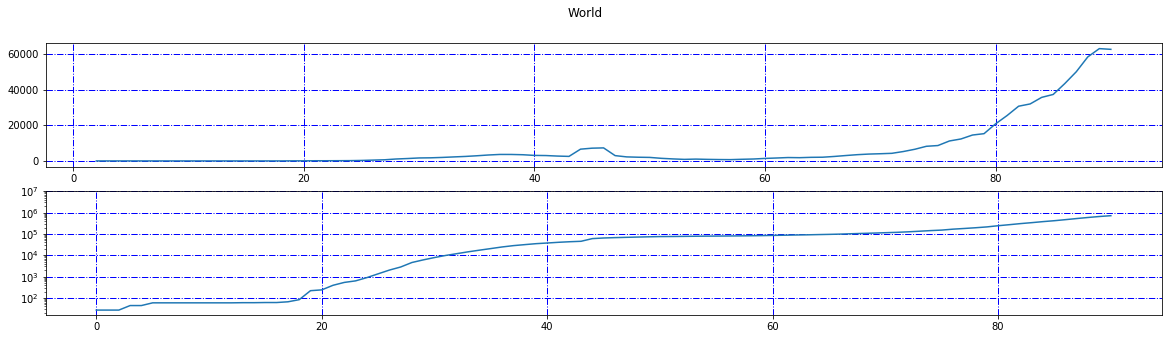

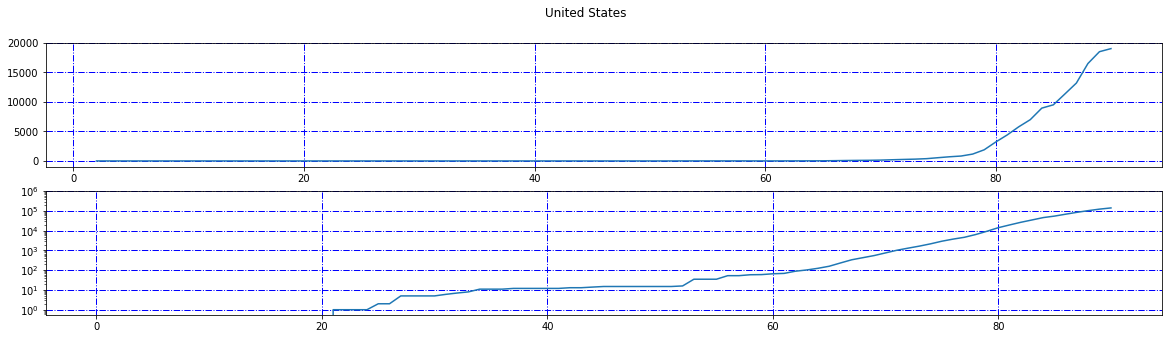

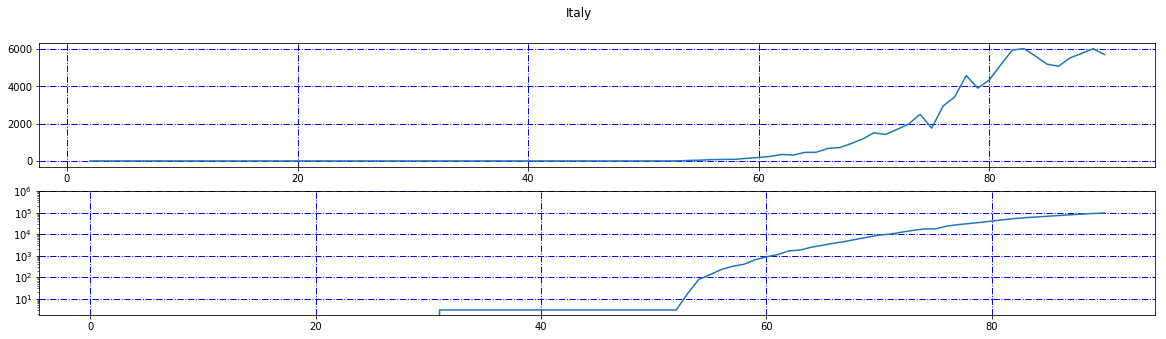

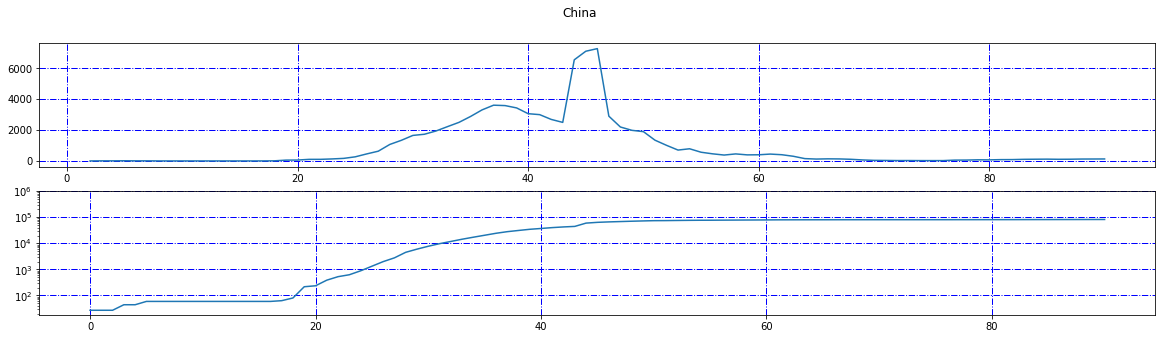

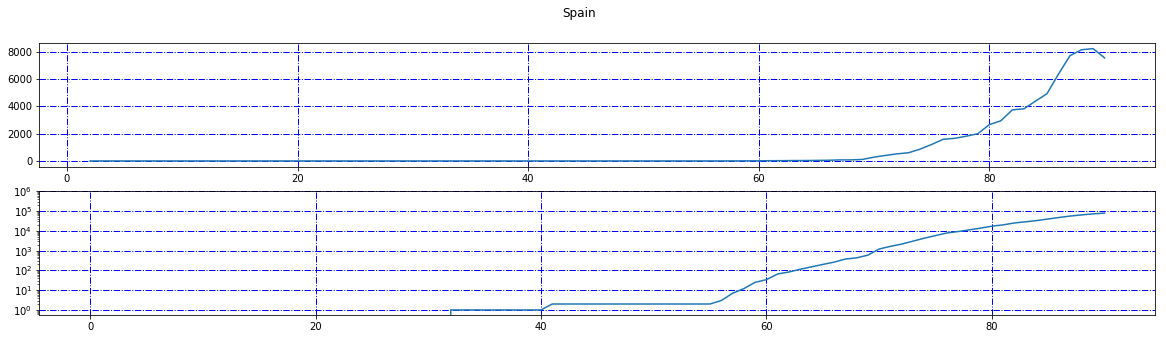

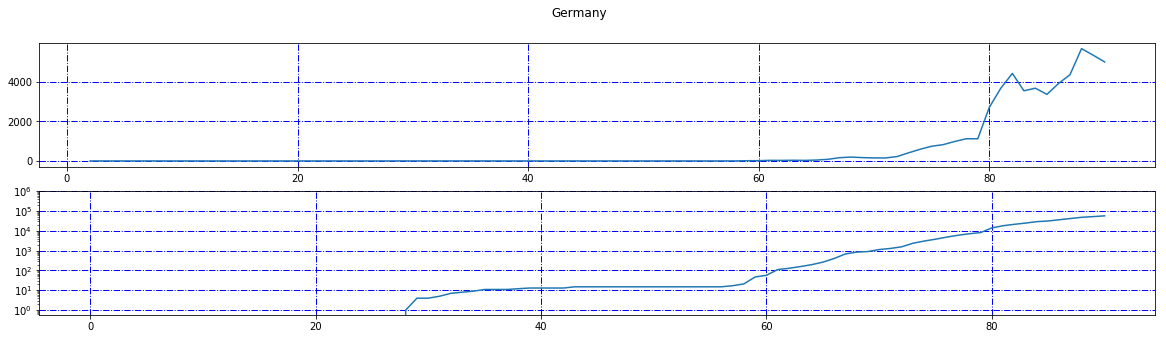

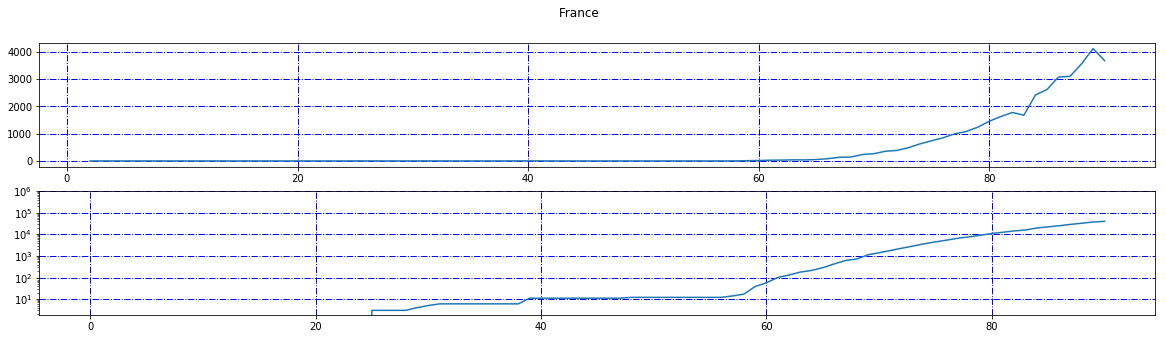

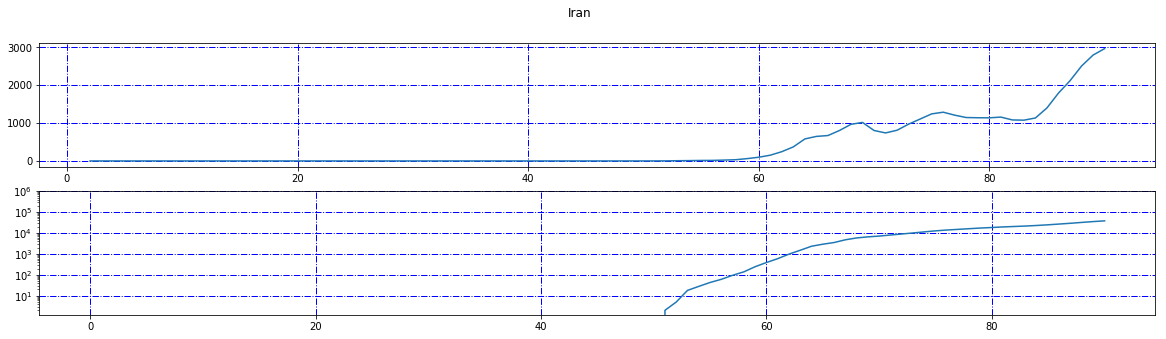

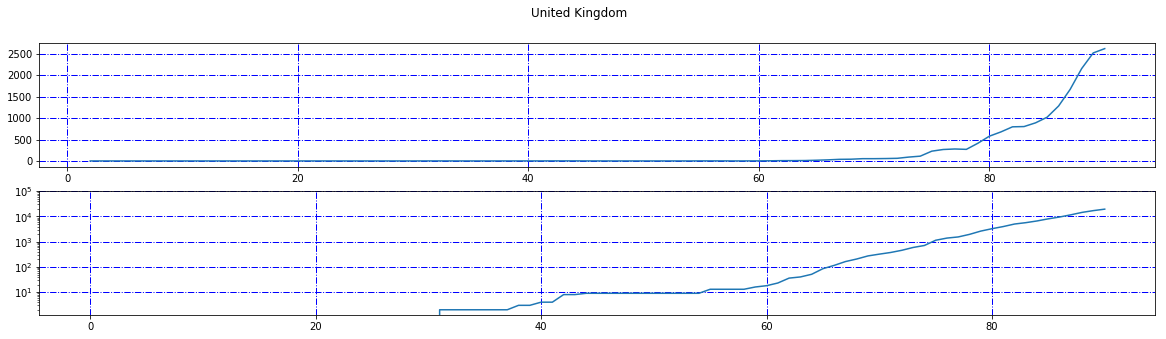

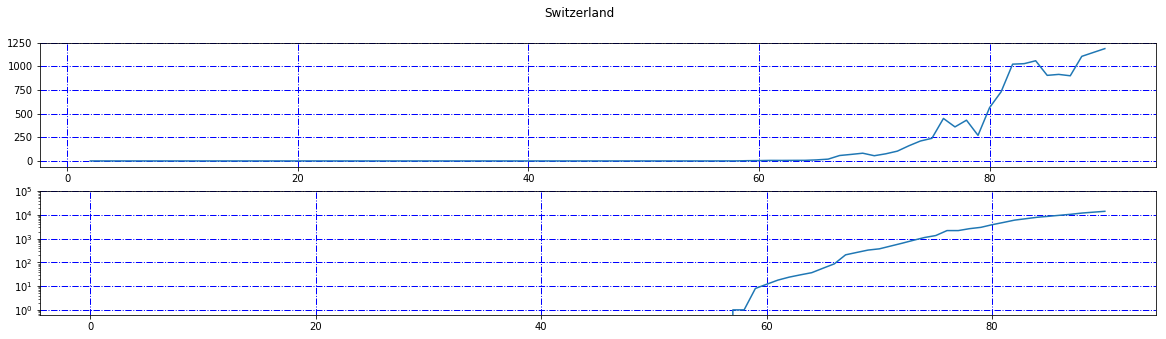

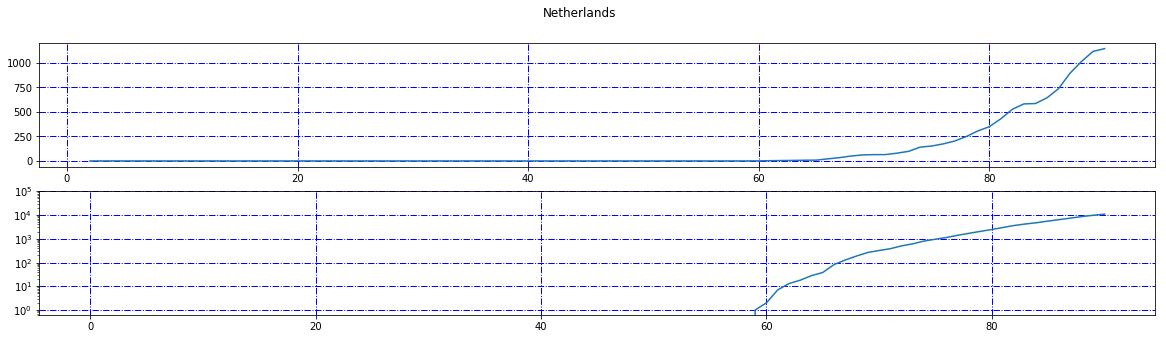

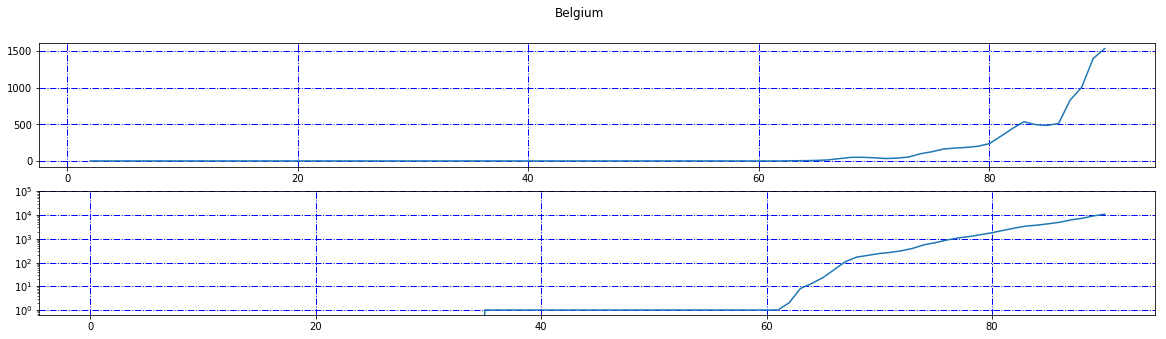

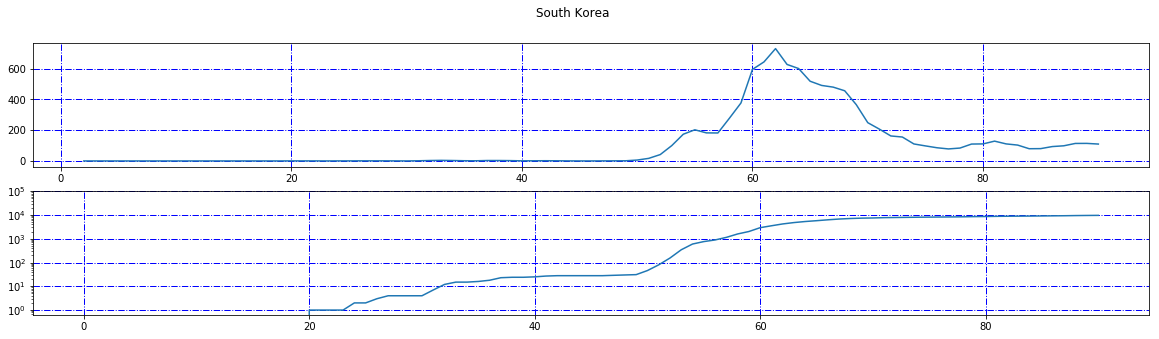

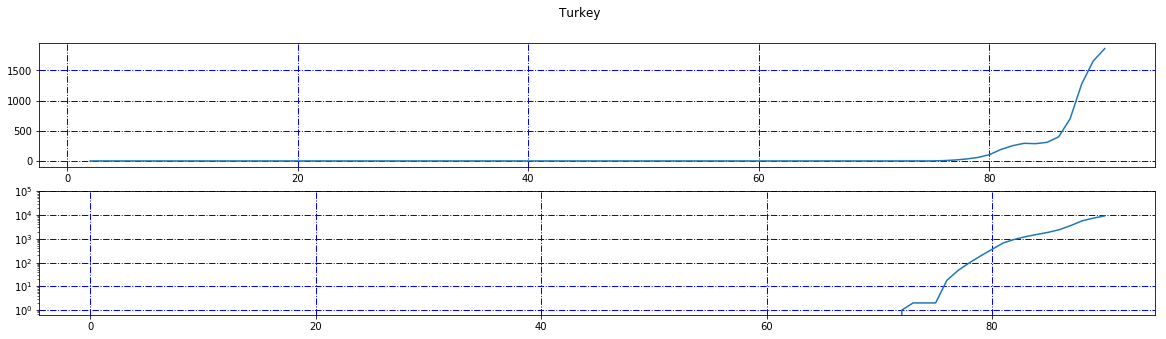

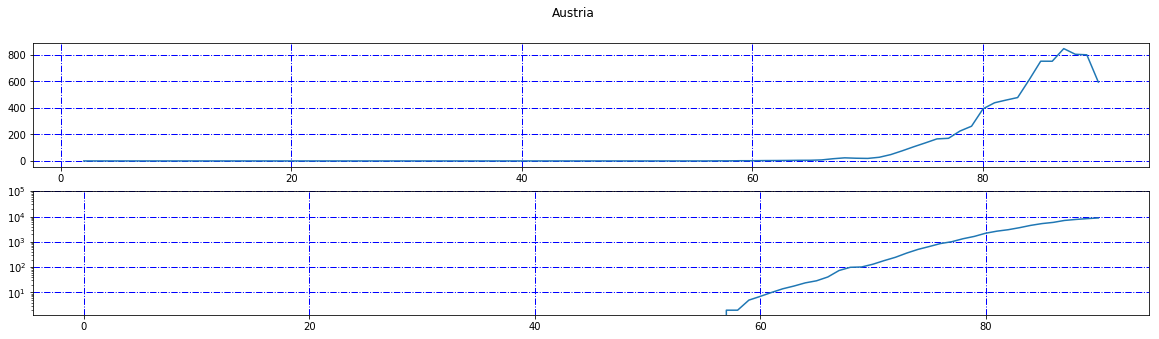

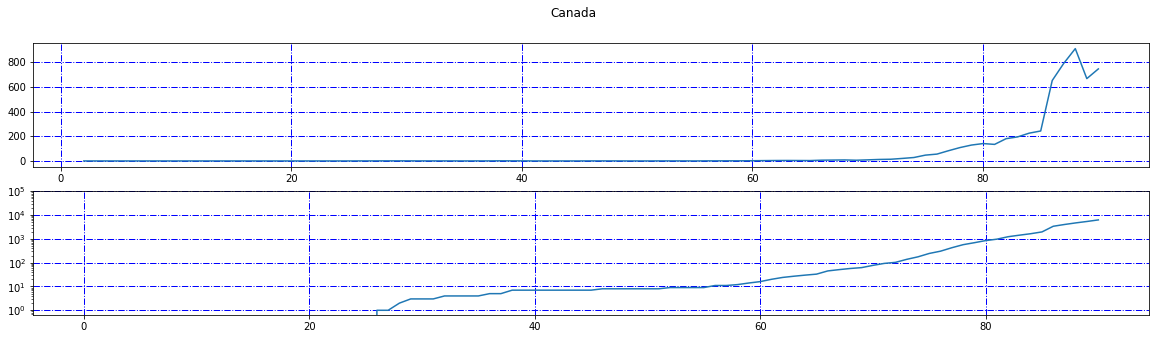

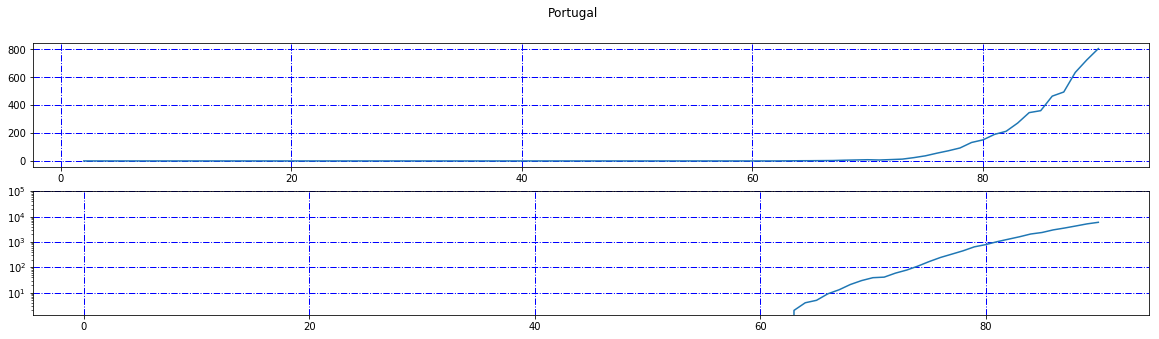

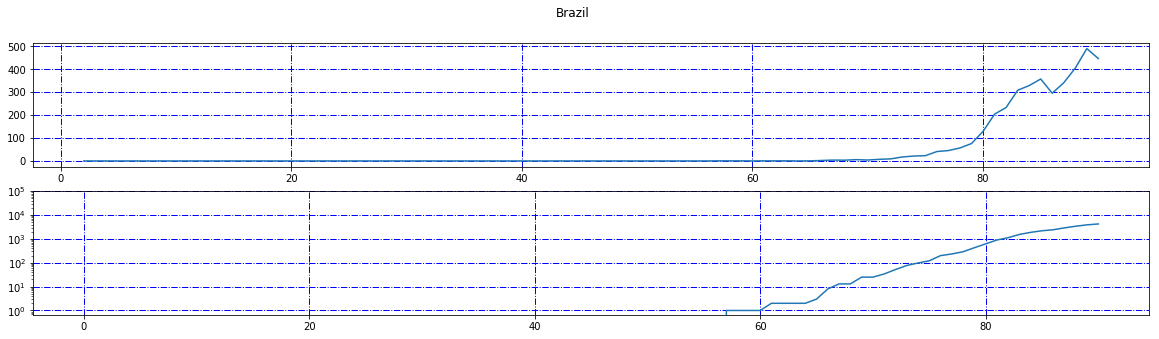

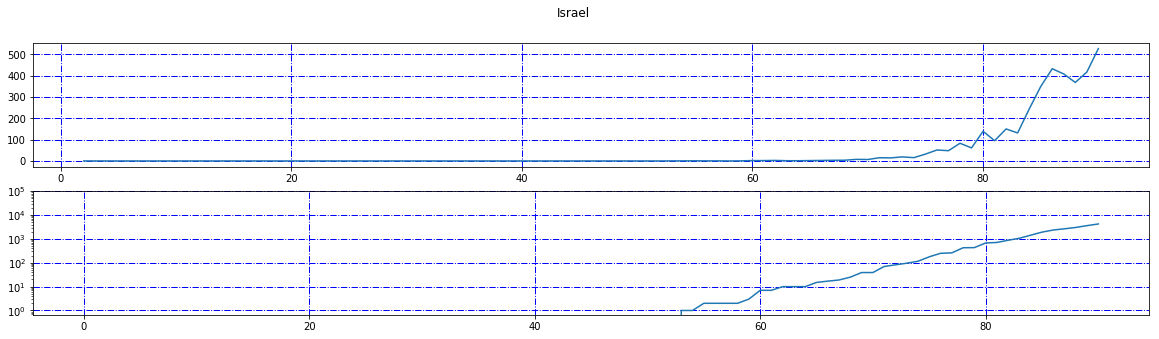

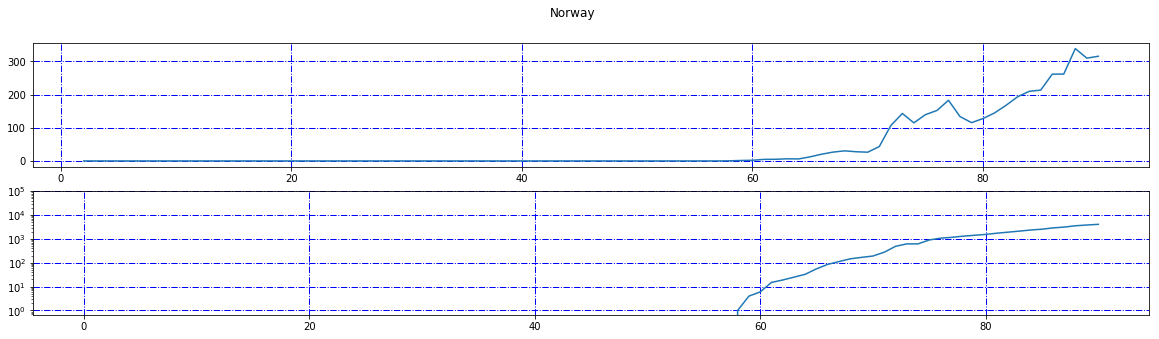

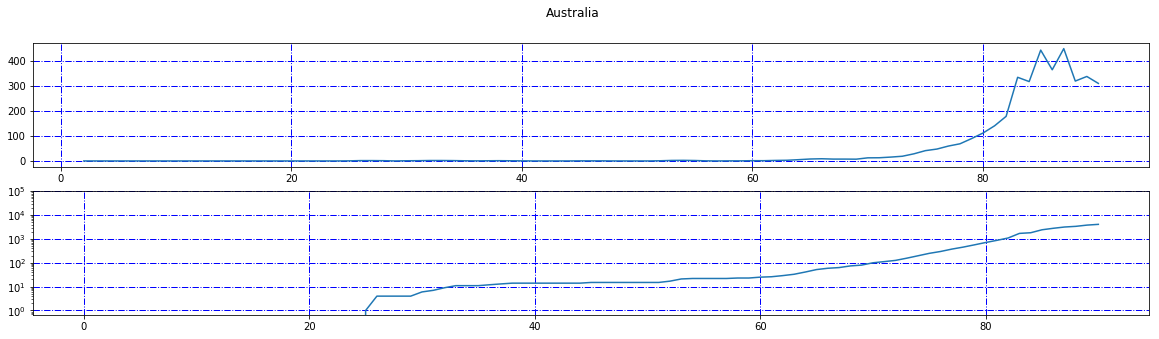

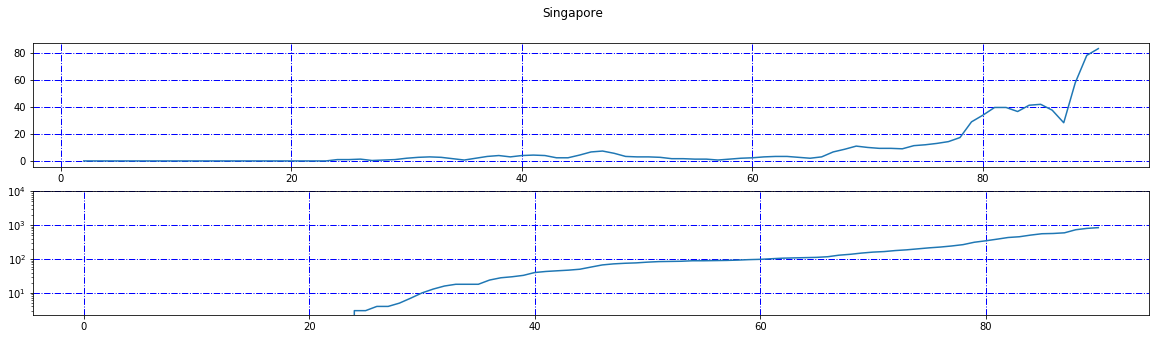

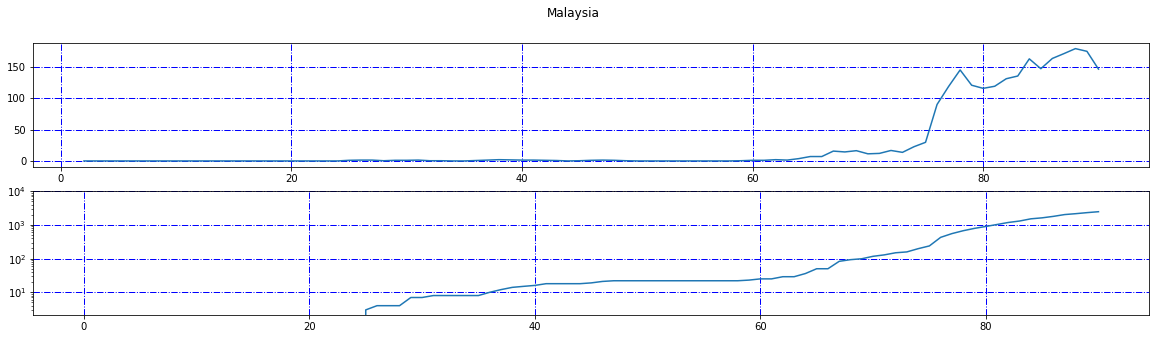

In [9]:
for country in Interested_countries:
    plt.rcParams["figure.figsize"] = (20,5)
    fig, (ax1, ax2) = plt.subplots(2)        
    ax1.grid(color='b', linestyle='-.', linewidth=1)
    ax1.plot(list(IC_total_cases_inc_ma[country]))   
    ax2.set_yscale('log')
    ls_IC_total_cases = list(IC_total_cases[country])
    ax2.plot(ls_IC_total_cases)
    ax2.grid(color='b', linestyle='-.', linewidth=1)
    ax2.set_ylim([0,10**(round(np.log10(max(ls_IC_total_cases)))+1)])
    fig.suptitle(country)    

# Plot table

In [10]:
tr_idx = total_recovered.index
tr_latest_date = tr_idx[len(tr_idx)-1]
print(tr_latest_date)
last_day_rate = [int(IC_total_cases_inc[country][-1]) for country in Interested_countries]
last_3days_rate = [int(IC_total_cases_inc_ma[country][-1].mean()) for country in Interested_countries]
last_7days_rate = [int(IC_total_cases_inc[country][-7:-1].mean()) for country in Interested_countries]
TotalCase = [IC_total_cases[country][-1] for country in Interested_countries]
TotalDeath = [IC_total_deaths[country][-1] for country in Interested_countries]
TotalRecovered = list(IC_total_recovered.loc[tr_latest_date,:])
DeathRatio = [td/(tr+td)*100 for td, tr in zip(TotalDeath, TotalRecovered)]
Dropping = [l3<l7 for l3, l7 in zip(last_3days_rate, last_7days_rate)]


last_rate_dict = {'country':Interested_countries, 'Last day inc':last_day_rate,'Last 3 days average inc' :last_3days_rate, 
                  'Last 7 days inc':last_7days_rate, 'TotalCase': TotalCase, 'TotalRecovered':TotalRecovered,
                  'TotalDeath': TotalDeath, 'DeathRatio %': DeathRatio, 'Dropping':Dropping}
pd.DataFrame.from_dict(last_rate_dict).set_index('country')

2020-03-30


,Last day inc,Last 3 days average inc,Last 7 days inc,TotalCase,TotalRecovered,TotalDeath,DeathRatio %,Dropping
country,,,,,,,,
World,58520,62547,53140,715660.0,164566,33579.0,16.946680,False
United States,18360,19011,14909,143025.0,5644,2509.0,30.773948,False
Italy,5217,5716,5555,97689.0,14620,10781.0,42.443211,False
China,121,128,115,82463.0,75923,3311.0,4.178762,False
Spain,6549,7536,7279,78797.0,16780,6528.0,28.007551,False
Germany,4751,5003,4628,57298.0,13500,455.0,3.260480,False
France,2599,3673,3592,40174.0,7964,2606.0,24.654683,False
Iran,2901,2967,2295,38309.0,13911,2640.0,15.950698,False
United Kingdom,2433,2621,1901,19522.0,171,1228.0,87.776984,False
